# Duffing Oscillator Solution

In [76]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import scipy as sp
import matplotlib.pyplot as plt
import mousai as ms
from scipy import pi, sin

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
# Test that all is working. Extra harmonics help the constant term of FFT land at zero. 
# Artificial biases cause this error because of non-zero relative phase of response. 
# Explaination needs an example. Just trust me. Use more harmonics. 
t, x, e, amps, phases = ms.hb_so(ms.duff_osc, sp.array([[0,1,-1]]), .7)
print(x,e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

[[-0.34996508  1.36054018 -1.11828552]] [[  1.25417740e-08  -2.37501882e-07   1.27609256e-10]]
Constant term of FFT of signal should be zero:  (-0.107710418302+0j)


In [95]:
# Let's get a smoother response
time, x = ms.time_history(t,x)

/Users/jslater/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


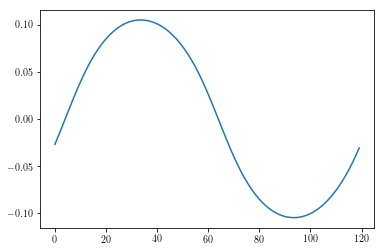

In [97]:
plt.plot(time,x.T)

In [21]:
t, x, e, amps, phases = ms.hb_so(ms.duff_osc, sp.array([[0,1,-1,0,0,0,0]]), .7, f_tol = 1e-10)
print(x)
print(sp.fftpack.fft(x))


[[-0.34850556  0.98635512  1.41526032  0.95129854 -0.40091298 -1.31613416
  -1.29636388]]
[[-0.00900260+0.j         -1.05973076-5.0343169j  -0.02567193+0.01682272j
  -0.12986547-0.17325323j -0.12986547+0.17325323j -0.02567193-0.01682272j
  -1.05973076+5.0343169j ]]


In [ ]:
x.shape[1]

In [ ]:
sp.fftpack.fft(x)

In [ ]:
plt.plot(t,sin(0.7*t))

In [ ]:
def duff_osc2(x, v, params):
    omega = params['omega']
    t = params['cur_time']
    return -x-.1*x**3-.01*v+1*sin(omega*t)

In [ ]:
omega = sp.linspace(0.1,3,200)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,-1,1,0,0]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq)#, f_tol = 1e-10)#, callback = resid)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

The break is an indicative of a break in the branch and is actually a result of the `solution` being unstable.  Not the system, but the solution. By that we mean that while this is considered a solution, it isn't one that will actually continue in a real situation and another solution will necessarily be found. 

A simple solution is to change the starting guess to be away from the solution and see if it finds another one. Indeed that happens. 



In [ ]:
omega = sp.linspace(0.1,3,90)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,-1,1,0,0,0,0,0,0]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    #print(sp.average(x))
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq, verbose = False, f_tol = 1e-6)#, callback = resid)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

In [ ]:
plt.plot(x.T,'*')

In [ ]:
omegal = sp.arange(3,.03,-1/200)+1/200
ampl = sp.zeros_like(omegal)
x = sp.array([[0,-1,1,0,0,0,0]])
for i, freq in enumerate(omegal):
    # Here we try to obtain solutions, but if they don't work, 
    # we ignore them by inserting `np.nan` values.
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq, f_tol = 1e-6)#, callback = resid)
        ampl[i]=amps[0]
    except:
        ampl[i] = sp.nan
plt.plot(omegal, ampl)

In [ ]:
x

In [ ]:
sp.fftpack.fft(x)

In [ ]:
plt.plot(x.T)

In [ ]:
plt.plot(omegal,ampl)
plt.plot(omega,amp)
#plt.axis([0,3, 0, 10.5])

In [ ]:
from scipy.optimize import newton_krylov

In [ ]:
def duff_amp_resid(a):
    return (mu**2+(sigma-3/8*alpha/omega_0*a**2)**2)*a**2-(k**2)/4/omega_0**2

In [ ]:
mu = 0.05 # damping
k = 1 # excitation amplitude
sigma = -0.9 #detuning
omega_0 = 1 # driving frequency
alpha = 0.1 # cubic coefficient

In [ ]:
newton_krylov(duff_amp_resid,-.1)

In [ ]:
sigmas = sp.linspace(-1,3,200)
amplitudes = sp.zeros_like(aa)
x = newton_krylov(duff_amp_resid,1)
for i, sigma in enumerate(sigmas):
    try:
        amplitudes[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudes[i]
    except:
        amplitudes[i] = newton_krylov(duff_amp_resid,0)
        x = amplitudes[i]

plt.plot(sigmas,amplitudes)

In [ ]:
sigmas = sp.linspace(-1,3,200)
sigmasr = sigmas[::-1]
amplitudesr = sp.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,3)
for i, sigma in enumerate(sigmasr):
    try:
        amplitudesr[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudesr[i]
    except:
        amplitudesr[i] = sp.nan#newton_krylov(duff_amp_resid,0)
        x = amplitudesr[i]
        

plt.plot(sigmasr,amplitudesr)

In [ ]:
plt.plot(sigmasr,amplitudesr)
plt.plot(sigmas,amplitudes)